In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sql
from matplotlib import ticker
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [1]:
%load_ext sql
import pandas as pd

df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
# Supongamos que estas son las columnas numéricas en el CSV
nuevos_nombres = {
    "4046": "categoria_a",
    "4225": "categoria_b",
    "4770": "categoria_c"
}

# Renombrar en el df
df.rename(columns=nuevos_nombres, inplace=True)


In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,categoria_a,categoria_b,categoria_c,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.columns = [col.lower().replace('%', '').strip().replace(' ', '_') for col in df.columns]
df.columns

Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

In [5]:
df_snow = df.copy()
df

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
print(df_snow.columns.tolist())

['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'region']


In [7]:
df_snow.type.unique()

array(['conventional', 'organic'], dtype=object)

In [8]:
dim_type = df[['type']].drop_duplicates().reset_index(drop=True)

# Asignar el código deseado a cada tipo
mapeo_tipo = {
    'conventional': 'TYC',
    'organic': 'TYO'
}

# Crear la columna type_id con los valores mapeados
dim_type['type_id'] = dim_type['type'].map(mapeo_tipo)

dim_type

,type,type_id
0,conventional,TYC
1,organic,TYO


In [9]:
df_snow = df_snow.merge(dim_type, on='type', how='left')
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,type_id
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,TYC
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,TYC
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,TYC
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,TYC
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,TYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,TYO
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,TYO
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,TYO
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,TYO


In [10]:
df_snow = df_snow.drop(columns=['type'])
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,year,region,type_id
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,TYC
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,TYC
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,TYC
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,TYC
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,TYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,TYO
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,TYO
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,TYO
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,TYO


In [11]:
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,year,region,type_id
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,TYC
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,TYC
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,TYC
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,TYC
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,TYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,TYO
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,TYO
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,TYO
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,TYO


In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['year'].dropna(), kde=True, bins=30)
plt.show()

NameError: name 'plt' is not defined

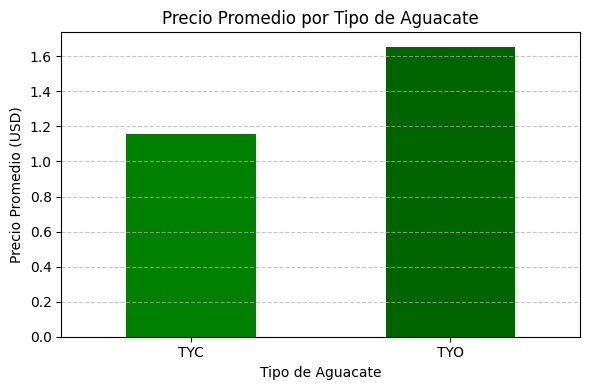

In [ ]:
precios_por_tipo = df_snow.groupby("type_id")["averageprice"].mean()

# Crear el diagrama de barras
plt.figure(figsize=(6, 4))
precios_por_tipo.plot(kind="bar", color=["green", "darkgreen"])
plt.title("Precio Promedio por Tipo de Aguacate")
plt.ylabel("Precio Promedio (USD)")
plt.xlabel("Tipo de Aguacate")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

/tmp/ipykernel_2607/2484089343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='year', y='averageprice', palette='coolwarm')


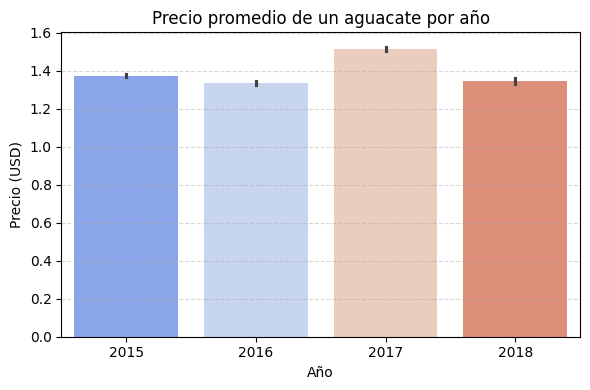

In [ ]:
# precio promedio por año 
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='year', y='averageprice', palette='coolwarm')

plt.title('Precio promedio de un aguacate por año')
plt.ylabel('Precio (USD)')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

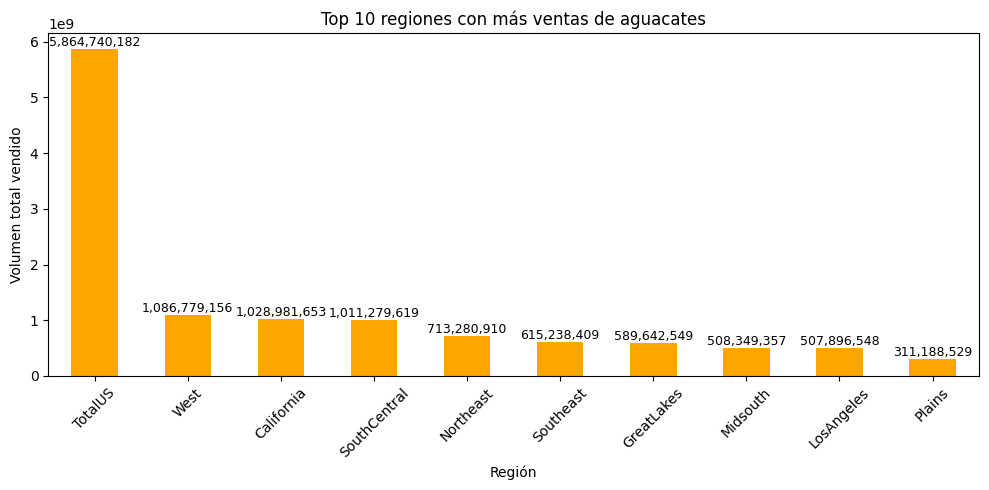

In [ ]:
ventas_region = df.groupby('region')['total_volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = ventas_region.plot(kind='bar', color='orange')

# Agregar etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title('Top 10 regiones con más ventas de aguacates')
plt.ylabel('Volumen total vendido')
plt.xlabel('Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2607/1327301682.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df.set_index('date').resample('M')['total_volume'].sum()


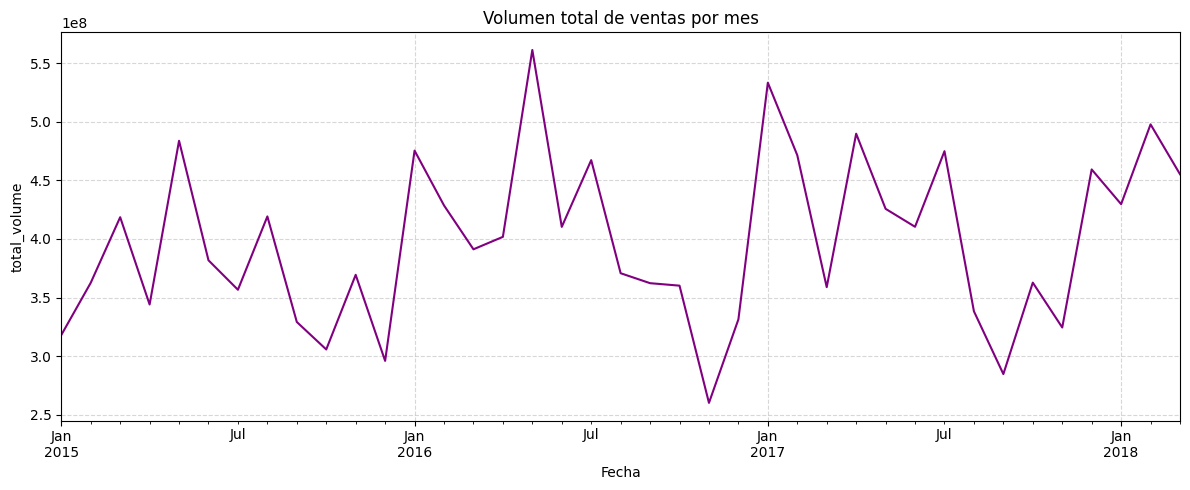

In [ ]:
# Asegúrate que la columna Date sea datetime
df['date'] = pd.to_datetime(df['date'])
df_mensual = df.set_index('date').resample('M')['total_volume'].sum()

plt.figure(figsize=(12,5))
df_mensual.plot(color='purple')

plt.title('Volumen total de ventas por mes')
plt.ylabel('total_volume')
plt.xlabel('Fecha')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


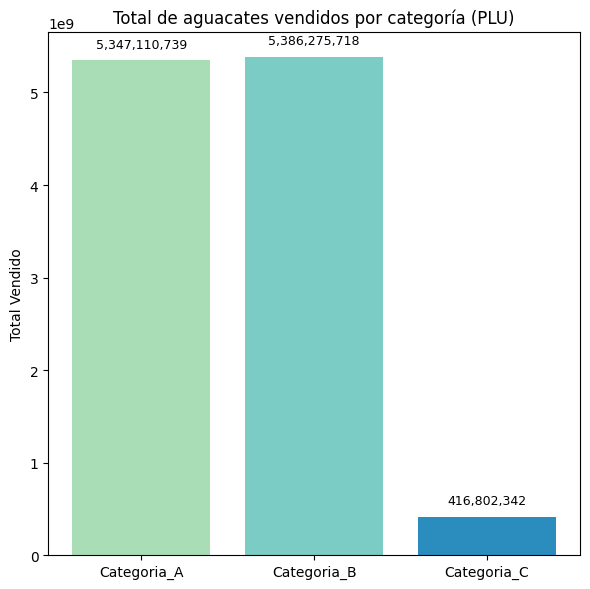

In [ ]:
df_plu = df[['categoria_a', 'categoria_b', 'categoria_c']].sum()
df_plu.index = ['Categoria_A', 'Categoria_B', 'Categoria_C']

plt.figure(figsize=(6,6))
bars = plt.bar(df_plu.index, df_plu.values, color=['#a8ddb5','#7bccc4','#2b8cbe'])

# Añadir valores numéricos sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e8, f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.title('Total de aguacates vendidos por categoría (PLU)')
plt.ylabel('Total Vendido')
plt.tight_layout()
plt.show()



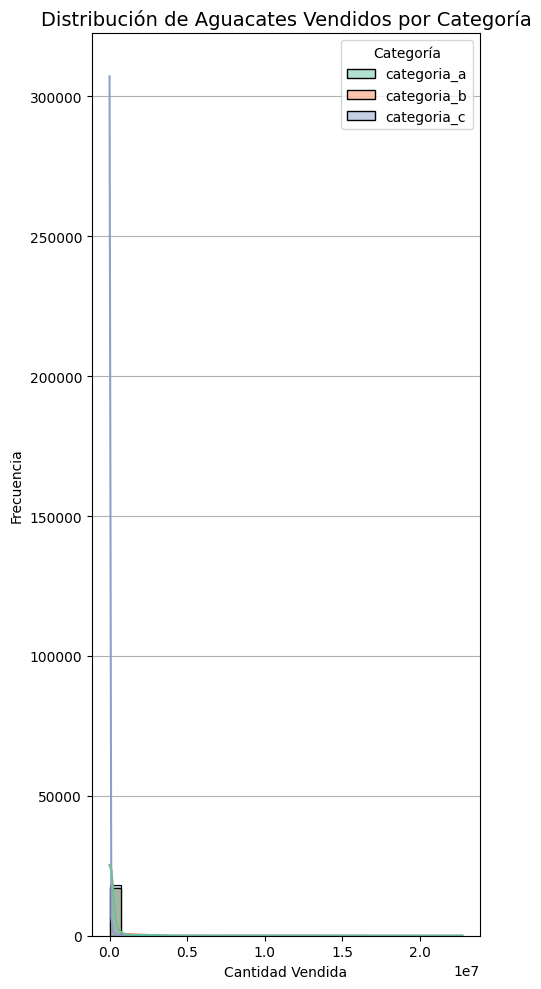

In [ ]:
# Primero organizamos los datos en formato largo (long format)
df_melt = df.melt(value_vars=['categoria_a', 'categoria_b', 'categoria_c'], 
                  var_name='Categoría', 
                  value_name='Cantidad Vendida')

# Creamos el histograma
plt.figure(figsize=(5,10))
sns.histplot(data=df_melt, x='Cantidad Vendida', hue='Categoría', bins=30, kde=True, palette='Set2')

# Títulos y etiquetas
plt.title("Distribución de Aguacates Vendidos por Categoría", fontsize=14)
plt.xlabel("Cantidad Vendida")
plt.ylabel("Frecuencia")
plt.grid(axis='y')

# Mostrar
plt.tight_layout()
plt.show()


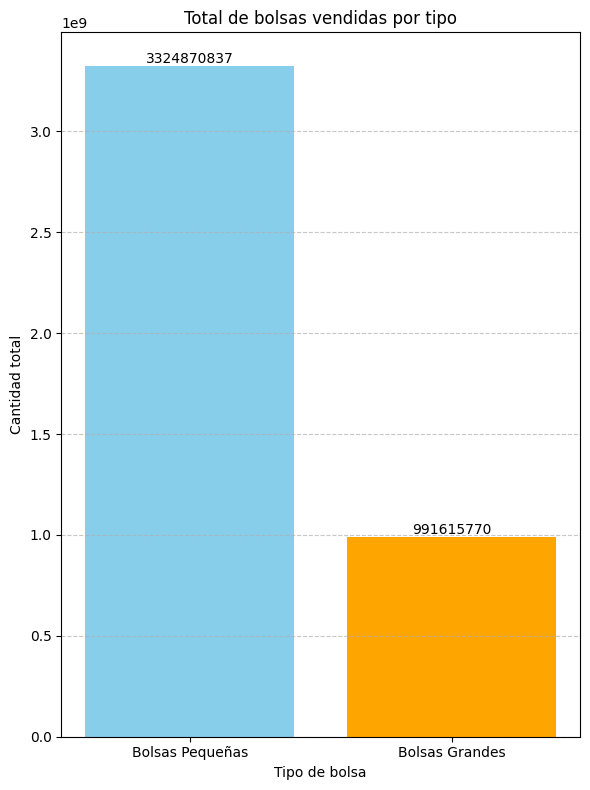

In [ ]:

# Sumar el total de bolsas pequeñas y grandes
total_small = df_snow["small_bags"].sum()
total_large = df_snow["large_bags"].sum()

# Crear un DataFrame con los totales
totales = pd.DataFrame({
    "tipo_bolsa": ["Bolsas Pequeñas", "Bolsas Grandes"],
    "cantidad": [total_small, total_large]
})

# Crear el gráfico de barras
plt.figure(figsize=(6, 8))
bars = plt.bar(totales["tipo_bolsa"], totales["cantidad"], color=["skyblue", "orange"])

# Añadir los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{int(yval)}', ha='center', va='bottom', fontsize=10)

# Añadir títulos y etiquetas
plt.title("Total de bolsas vendidas por tipo")
plt.xlabel("Tipo de bolsa")
plt.ylabel("Cantidad total")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

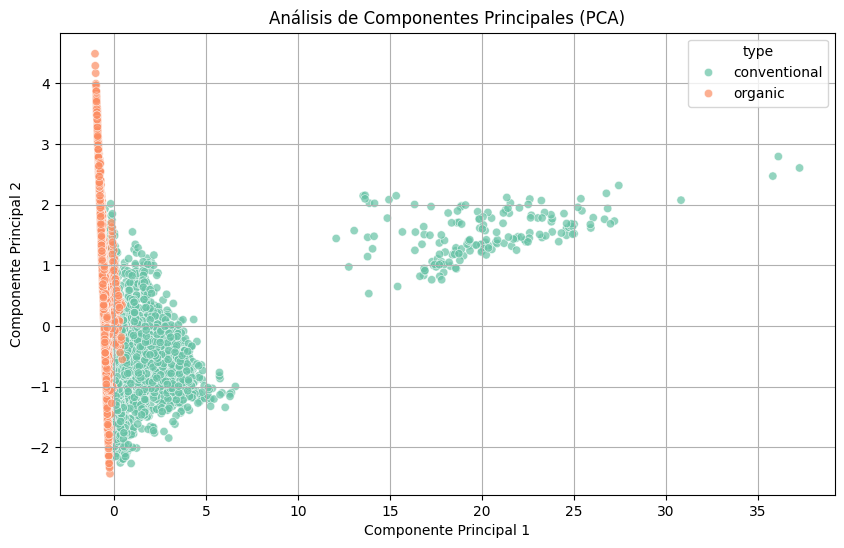

In [ ]:
# Normalizar los datos
scaler = StandardScaler()

data_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['type'] = df['type'].values
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='type', palette='Set2', alpha=0.7)
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()  

In [ ]:
X = df_snow[['averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c', 'total_bags']]

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters_dbscan = dbscan.fit_predict(data_scaled)

In [ ]:
df_snow['cluster'] = dbscan.labels_

In [ ]:
df_dbscan = X.copy()
df_dbscan['Cluster'] = clusters_dbscan
cluster_means_dbscan = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster').mean()
print("Características principales de cada cluster en DBSCAN:")
print(cluster_means_dbscan)

Características principales de cada cluster en DBSCAN:
         averageprice  total_volume   categoria_a   categoria_b  \
Cluster                                                           
0            1.412072  5.054997e+05  1.690297e+05  1.778324e+05   
1            0.940000  6.611113e+06  2.191819e+06  2.124617e+06   
2            0.756000  6.307144e+06  3.280825e+06  1.228919e+06   
3            1.854286  2.312194e+06  4.395111e+05  8.152207e+05   

           categoria_c    total_bags  
Cluster                               
0         12596.706790  1.460388e+05  
1        314581.102500  1.980096e+06  
2        656077.610000  1.141322e+06  
3        178177.525714  8.792844e+05  


In [ ]:
df_dbscan

,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,Cluster
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0
...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,0


<Figure size 800x600 with 0 Axes>

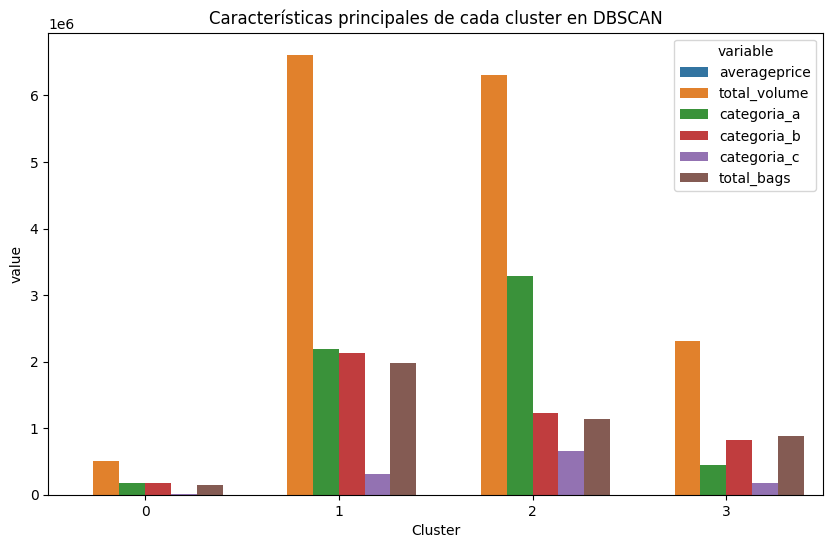

<Figure size 800x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_dbscan.reset_index().melt(id_vars='Cluster'), x='Cluster', y='value', hue='variable')
plt.xlabel("Cluster")
plt.title("Características principales de cada cluster en DBSCAN")
plt.figure(figsize=(8, 6))

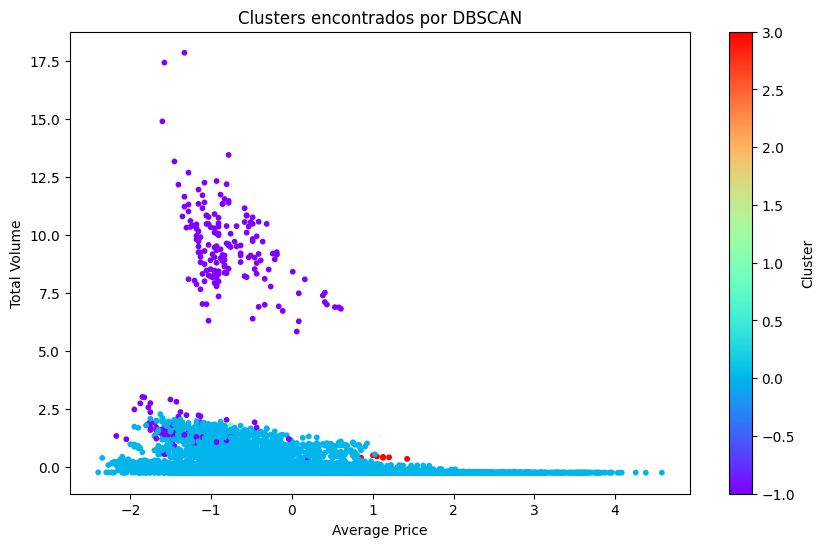

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df_snow['cluster'], cmap='rainbow', s=10)
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.title('Clusters encontrados por DBSCAN')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,year,region,type_id,cluster
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,TYC,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,TYC,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,TYC,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,TYC,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,TYC,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,TYO,0
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,TYO,0
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,TYO,0
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,TYO,0


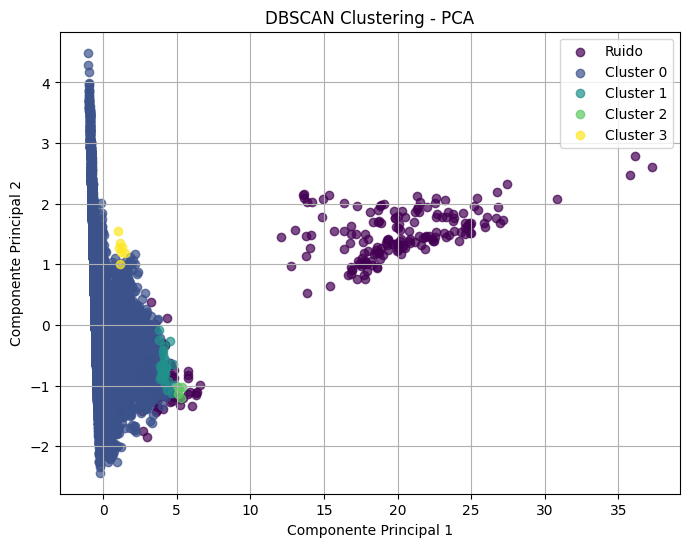

In [ ]:
plt.figure(figsize=(8, 6))
unique_labels = np.unique(clusters_dbscan)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    label_mask = clusters_dbscan == label
    label_name = f"Ruido" if label == -1 else f"Cluster {label}"
    plt.scatter(X_pca[label_mask, 0], X_pca[label_mask, 1], 
                label=label_name, color=color, alpha=0.7)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("DBSCAN Clustering - PCA")
plt.legend()
plt.grid()
plt.show()